In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [6]:
## LOAD EMBEDDINGS
df_embeddings_train = pd.read_csv(f"/mnt/data2/datasets_lfay/MedImageInsights/data/Chexpert/train_embeddings.csv")
df_embeddings_val = pd.read_csv(f"/mnt/data2/datasets_lfay/MedImageInsights/data/Chexpert/val_embeddings.csv")
df_embeddings_test = pd.read_csv(f"/mnt/data2/datasets_lfay/MedImageInsights/data/Chexpert/test_embeddings.csv")


# Rename Unnamed: 0 to Path
df_embeddings_train = df_embeddings_train.rename(columns={"Unnamed: 0": "Path"})
df_embeddings_val = df_embeddings_val.rename(columns={"Unnamed: 0": "Path"})
df_embeddings_test = df_embeddings_test.rename(columns={"Unnamed: 0": "Path"})



# Remove from each Path the first part of the path to match the original path
df_embeddings_train["Path"] = df_embeddings_train["Path"].apply(lambda x: os.path.join( *x.split('/')[6:]))
df_embeddings_val["Path"] = df_embeddings_val["Path"].apply(lambda x: os.path.join( *x.split('/')[6:]))
df_embeddings_test["Path"] = df_embeddings_test["Path"].apply(lambda x: os.path.join( *x.split('/')[6:]))

## LOAD DATASET
df_train = pd.read_csv("/mnt/data2/datasets_lfay/MedImageInsights/data/Chexpert/train.csv")
df_val = pd.read_csv("/mnt/data2/datasets_lfay/MedImageInsights/data/Chexpert/val.csv")
df_test = pd.read_csv("/mnt/data2/datasets_lfay/MedImageInsights/data/Chexpert/test.csv")

df_train = df_train.rename(columns={"path_to_image": "Path"})
df_val = df_val.rename(columns={"path_to_image": "Path"})
df_test = df_test.rename(columns={"path_to_image": "Path"})

df_train["Path"] = df_train["Path"].apply(lambda x: os.path.join( *x.split('/')[:]))
df_val["Path"] = df_val["Path"].apply(lambda x: os.path.join( *x.split('/')[:]))
df_test["Path"] = df_test["Path"].apply(lambda x: os.path.join( *x.split('/')[:]))

## MERGE
df_train_merged = pd.merge(df_train, df_embeddings_train, on="Path")
df_val_merged = pd.merge(df_val, df_embeddings_val, on="Path")
df_test_merged = pd.merge(df_test, df_embeddings_test, on="Path")

In [14]:

def get_colors(n=2):
    colors = ['#C6DCEC',  # Light Blue
        '#FFDEC2',  # Light Peach
        '#C9E6C9',  # Light Green
        '#F9E2AF',  # Pale Yellow
        '#E5C1CD',  # Light Pink
        '#D1E8E2',  # Light Teal
        '#FFE4B5',  # Soft Light Orange
        '#ECD5E3',  # Soft Lavender
        '#CCE5FF',  # Soft Blue
        '#FFD1BA']  # Light Coral
    return colors[:n]

def add_labels(ax, total_count=None, rotation=0):
    for p in ax.patches:
        height = p.get_height()
        if total_count is not None:
            percentage = (height / total_count) * 100
            label = f'{int(height)}\n({percentage:.1f}%)'
        else:
            label = f'{int(height)}'
        ax.annotate(label, 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='baseline', fontsize=12, color='black', 
                    xytext=(0, -15), textcoords='offset points', rotation=rotation)

def plot_categorical(df, column, ax, colors, total_count=None, rotation=0):
    sns.countplot(x=column, data=df, hue=column, ax=ax, palette=colors)
    ax.set_title(column.capitalize())
    if rotation:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, ha="right")
    add_labels(ax, total_count)


NameError: name 'get_colors' is not defined

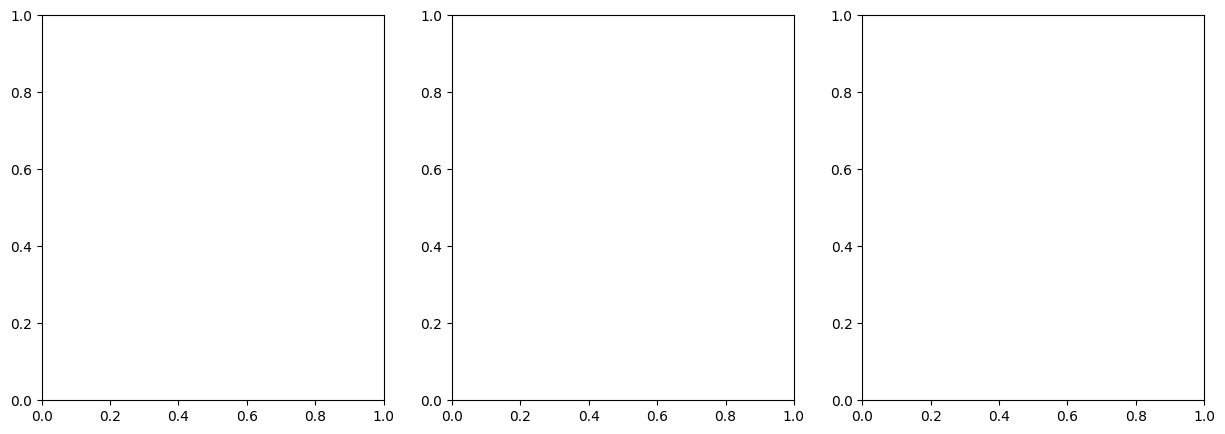

: 

In [ ]:
#  Create subplot with histogram for Pneumonia for df_train_merged and df_val_merged, df_test_merged
# Pneumonia if label is 1 No Pneumonia if label is 
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
colors = get_colors(2)
plot_categorical(df_train_merged, 'Pneumonia', axs[0], colors, total_count=len(df_train_merged))
plot_categorical(df_val_merged, 'Pneumonia', axs[1], colors, total_count=len(df_val_merged))
plot_categorical(df_test_merged, 'Pneumonia', axs[2], colors, total_count=len(df_test_merged))
plt.tight_layout()



In [11]:
# Create a list of the last 1024 columns
selected_columns = df_train_merged.columns[-1024:].tolist()

# Add "Pneumonia" to the list
selected_columns.append("Pneumonia")

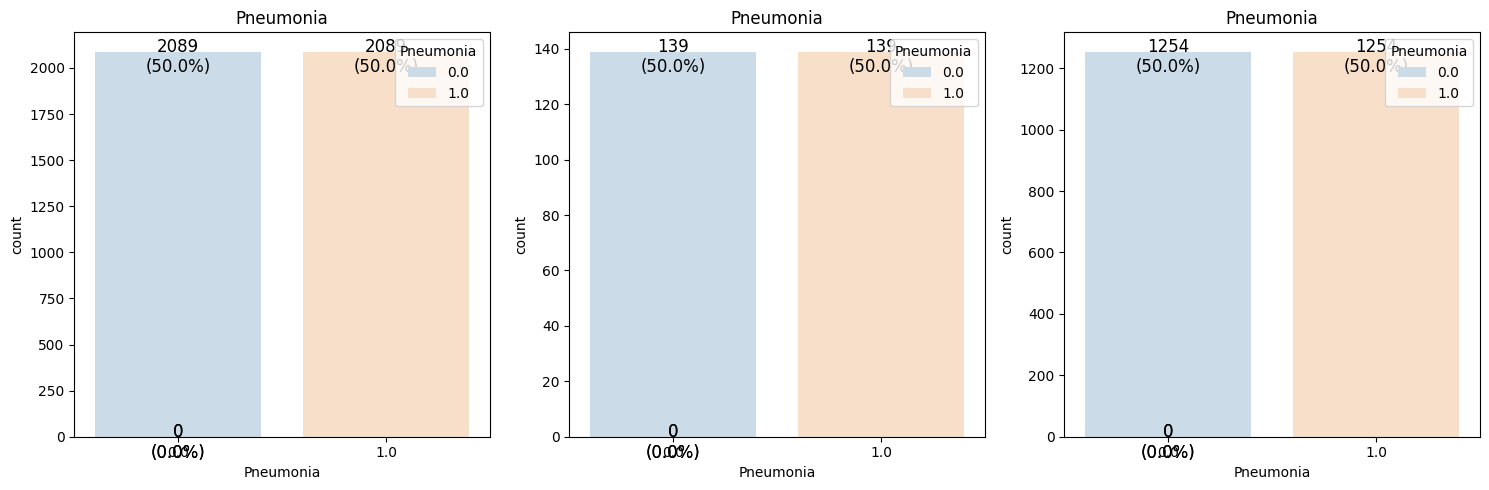

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
colors = get_colors(2)
plot_categorical(df_train_merged[selected_columns], 'Pneumonia', axs[0], colors, total_count=len(df_train_merged))
plot_categorical(df_val_merged[selected_columns], 'Pneumonia', axs[1], colors, total_count=len(df_val_merged))
plot_categorical(df_test_merged[selected_columns], 'Pneumonia', axs[2], colors, total_count=len(df_test_merged))
plt.tight_layout()

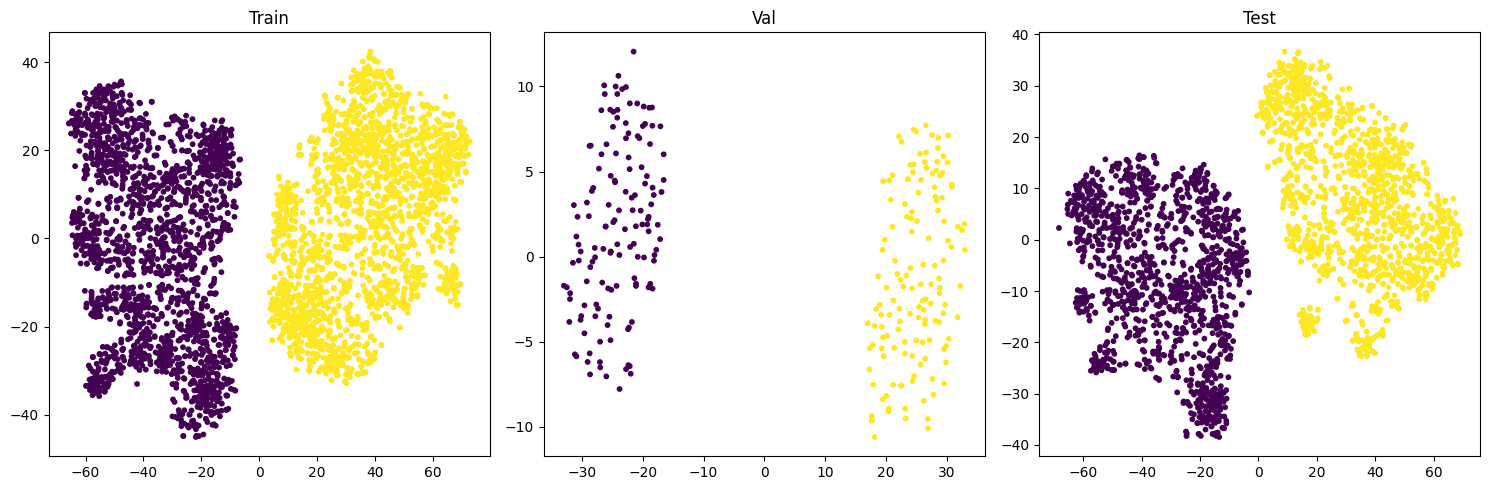

In [16]:
# Create tsne plot for the embeddings
from sklearn.manifold import TSNE
# extract columns with name 0-1024 and pneumonia

def plot_tsne(df, ax, title):
    tsne = TSNE(n_components=2, random_state=0)
    X_2d = tsne.fit_transform(df.iloc[:, 1:])
    ax.scatter(X_2d[:, 0], X_2d[:, 1], c=df['Pneumonia'], cmap='viridis', s=10)
    ax.set_title(title)

def plot_tsne_1d(df, ax, title):
    tsne = TSNE(n_components=1, random_state=0)
    X_2d = tsne.fit_transform(df.iloc[:, 1:])
    ax.scatter(X_2d, np.zeros_like(X_2d), c=df['Pneumonia'], cmap='viridis', s=10)
    ax.set_title(title)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs = axs.flatten()
plot_tsne(df_train_merged[selected_columns], axs[0], 'Train')
plot_tsne(df_val_merged[selected_columns], axs[1], 'Val')
plot_tsne(df_test_merged[selected_columns], axs[2], 'Test')

# plot_tsne_1d(df_train_merged[selected_columns], axs[3], 'Train')
# plot_tsne_1d(df_val_merged[selected_columns], axs[4], 'Val')
# plot_tsne_1d(df_test_merged[selected_columns], axs[5], 'Test')


plt.tight_layout()
plt.show()

In [7]:
pneumonia_count = df_train_merged["Pneumonia"].value_counts()[1]
df_train_merged = pd.concat([df_train_merged[df_train_merged["Pneumonia"] == 0].sample(n=pneumonia_count, random_state=42), df_train_merged[df_train_merged["Pneumonia"] == 1]])
pneumonia_count = df_val_merged["Pneumonia"].value_counts()[1]
df_val_merged = pd.concat([df_val_merged[df_val_merged["Pneumonia"] == 0].sample(n=pneumonia_count, random_state=42), df_val_merged[df_val_merged["Pneumonia"] == 1]])

pneumonia_count = df_test_merged["Pneumonia"].value_counts()[1]
df_test_merged = pd.concat([df_test_merged[df_test_merged["Pneumonia"] == 0].sample(n=pneumonia_count, random_state=42), df_test_merged[df_test_merged["Pneumonia"] == 1]])


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE

# Function to plot t-SNE with marginal distributions for one dimension
def plot_tsne_with_marginals(df, ax, label):
    tsne = TSNE(n_components=1, random_state=0)
    X_2d = tsne.fit_transform(df.iloc[:, 1:])  # Apply t-SNE to features
    
    # Scatter plot of the t-SNE 2D projections
    scatter = ax.scatter(X_2d[:, 0], X_2d[:, 1], c=df['Pneumonia'], cmap='viridis', s=10)
    ax.set_title(f'# samples per class: {int(len(df)/2)}')

    # Marginal distribution for the first dimension of t-SNE (X-axis)
    #sns.kdeplot(x=X_2d[:, 0], hue=df[label], ax=ax, fill=True, alpha=0.3, linewidth=2)
    


NameError: name 'selected_columns' is not defined

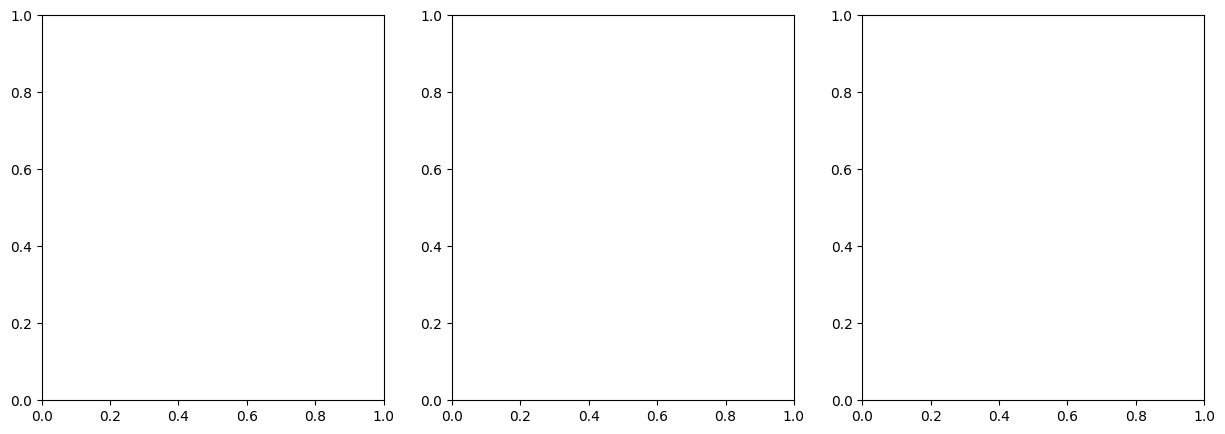

In [10]:

# Create subplots for t-SNE plots with marginal distributions for the first t-SNE dimension
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot t-SNE with marginal distributions for Train, Validation, and Test
plot_tsne_with_marginals(df_train_merged[selected_columns], axs[0], 'Train - t-SNE')
plot_tsne_with_marginals(df_val_merged[selected_columns], axs[1], 'Val - t-SNE')
plot_tsne_with_marginals(df_test_merged[selected_columns], axs[2], 'Test - t-SNE')

# Optional: Add a color bar for the scatter plot
#fig.colorbar(scatter_train, ax=axs, orientation='vertical', label='Pneumonia')

plt.tight_layout()
plt.show()


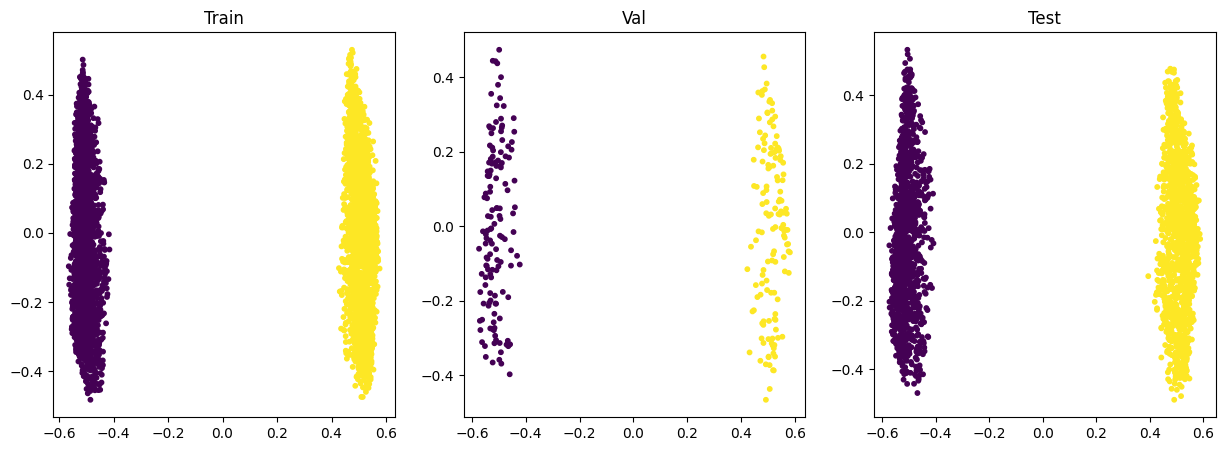

In [44]:
# create PCA plot for the embeddings
from sklearn.decomposition import PCA

def plot_pca(df, ax, title):
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(df.iloc[:, 1:])
    ax.scatter(X_2d[:, 0], X_2d[:, 1], c=df['Pneumonia'], cmap='viridis', s=10)
    ax.set_title(title)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plot_pca(df_train_merged[selected_columns], axs[0], 'Train')
plot_pca(df_val_merged[selected_columns], axs[1], 'Val')
plot_pca(df_test_merged[selected_columns], axs[2], 'Test')



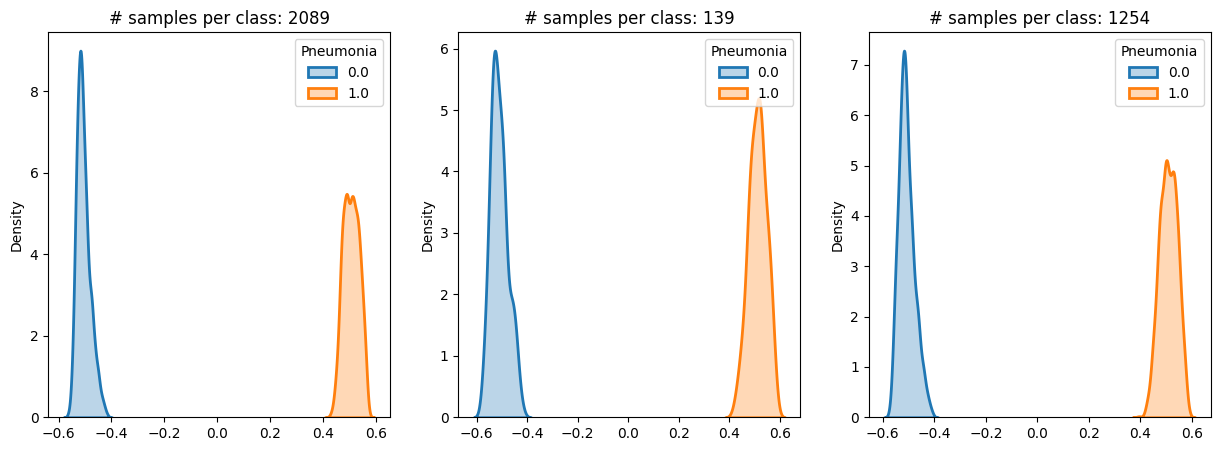

In [49]:
def plot_pca_with_marginals(df, ax, title):
    pca = PCA(n_components=1)
    X_2d = pca.fit_transform(df.iloc[:, 1:])  # Apply PCA to features
    
    # Scatter plot of the PCA 2D projections
    #scatter = ax.scatter(X_2d[:, 0], X_2d[:, 1], c=df['Pneumonia'], cmap='viridis', s=10)
    ax.set_title(f'# samples per class: {int(len(df)/2)}')

    # Marginal distribution for the first dimension of PCA (X-axis)
    sns.kdeplot(x=X_2d[:, 0], hue=df['Pneumonia'], ax=ax, fill=True, alpha=0.3, linewidth=2)
    
    ##return scatter

# Create subplots for PCA plots with marginal distributions for the first PCA dimension
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot PCA with marginal distributions for Train, Validation, and Test
plot_pca_with_marginals(df_train_merged[selected_columns], axs[0], 'Train - PCA')
plot_pca_with_marginals(df_val_merged[selected_columns], axs[1], 'Val - PCA')
plot_pca_with_marginals(df_test_merged[selected_columns], axs[2], 'Test - PCA')


In [51]:
df_train_merged.columns[10:40]

Index(['section_comparison', 'section_technique', 'section_procedure_comments',
       'section_findings', 'section_impression', 'section_end_of_impression',
       'section_summary', 'section_accession_number', 'age', 'sex', 'race',
       'ethnicity', 'interpreter_needed', 'insurance_type', 'recent_bmi',
       'deceased', 'split', 'No Finding', 'Enlarged Cardiomediastinum',
       'Cardiomegaly', 'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation',
       'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion',
       'Pleural Other', 'Fracture'],
      dtype='object')

In [52]:
# Create a list of the last 1024 columns
selected_columns = df_train_merged.columns[-1024:].tolist()

# Add "Pneumonia" to the list
selected_columns.append("sex")

sex
0          2391
1          1784
Unknown       3
Name: count, dtype: int64

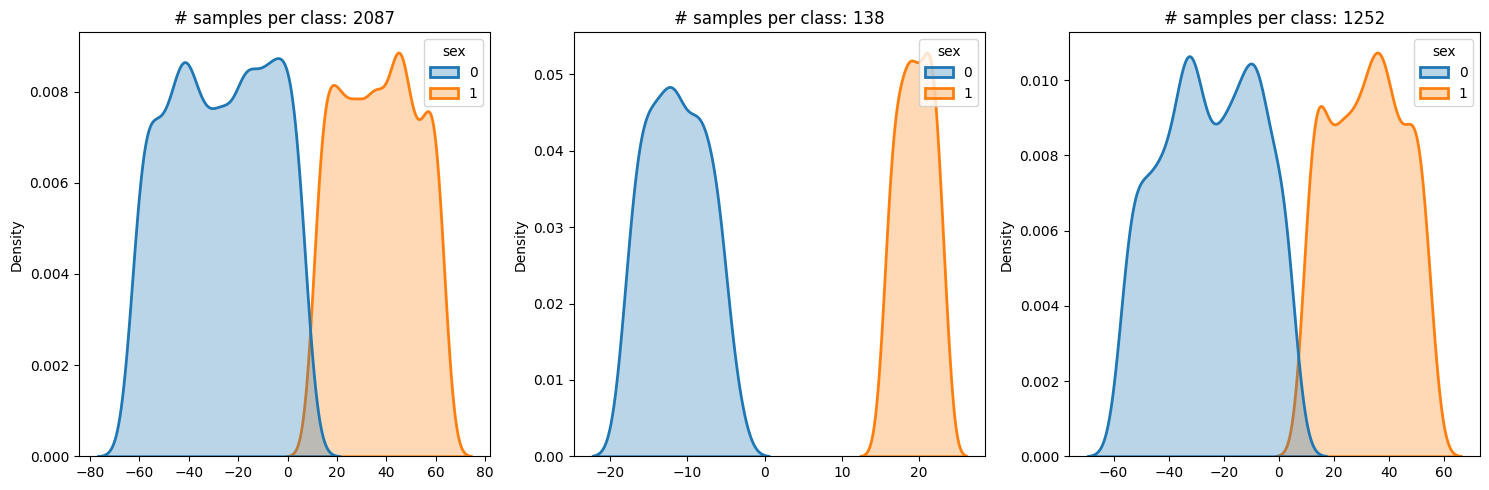

In [61]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# change columns sex: female to 1 and male to 0
df_train_merged["sex"] = df_train_merged["sex"].replace({"Female":1, "Male":0}) 
df_val_merged["sex"] = df_val_merged["sex"].replace({"Female":1, "Male":0}) 
df_test_merged["sex"] = df_test_merged["sex"].replace({"Female":1, "Male":0}) 
# drop rows with Unknown sex
df_train_merged = df_train_merged[df_train_merged.sex != "Unknown"]
df_val_merged = df_val_merged[df_val_merged.sex != "Unknown"]
df_test_merged = df_test_merged[df_test_merged.sex != "Unknown"]
# # Plot t-SNE with marginal distributions for Train, Validation, and Test
plot_tsne_with_marginals(df_train_merged[selected_columns], axs[0], 'sex')
plot_tsne_with_marginals(df_val_merged[selected_columns], axs[1], 'sex')
plot_tsne_with_marginals(df_test_merged[selected_columns], axs[2], 'sex')

# Optional: Add a color bar for the scatter plot
#fig.colorbar(scatter_train, ax=axs, orientation='vertical', label='Pneumonia')

plt.tight_layout()
plt.show()
